<a href="https://colab.research.google.com/github/dianamilenachaparro/EntregalesBIT/blob/main/Entregable_3_Clase_7_Taller_Pandas_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Pandas - Numpy

### **Instrucciones:**

1. Formula 1 pregunta de análisis sobre tu conjunto de datos
2. Utilizando Pandas y Numpy:
  - Limpieza de datos (Pandas: dropna, fillna, replace, etc.)
  - Filtrado y selección de datos
  - Transformación de columnas, creación de variables nuevas
  - Agrupaciones y resúmenes (groupby)
  - Conversión a array NumPy para operaciones matemáticas rápidas (media, desvío, normalización, operaciones vectorizadas)
3. Responde la pregunta planteada con una breve interpretación.

### **Ejemplos de preguntas para el reto:**
- ¿Cuál es el promedio de ventas por mes?
- ¿Cómo cambian la cantidad de productos exportados a lo largo del tiempo?
- ¿Hay valores atípicos en alguna columna numérica? ¿Cómo los tratarías?
- ¿Cuál es la categoría más frecuente y qué la distingue en el dataset?
- ¿Qué porcentaje de transacciones tiene una cantidad vendida superior al promedio?
- ¿Qué días tuvieron ventas totales fuera de lo común (muy altas o muy bajas)?

---
## Ejemplo
https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features

In [8]:
import pandas as pd
import numpy as np

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)

ruta_archivo = path + "/ai_job_dataset.csv"

Path to dataset files: /kaggle/input/global-ai-job-market-and-salary-trends-2025


In [10]:
database = pd.read_csv(ruta_archivo)# Leer el dataset en formato CSV


#Se usa encoding latin-1 ya que la base de datos fue guardada en esa condificación.
#Se usa skip en on_bad_lines dado que una línea sólo contenia 2 columnas y generaba error al importar.
database.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [11]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [12]:
database.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [13]:
for column in database.columns:
  print(f"Valores unico de '{column}':")
  print(database[column].unique())
  print("-" * 30)

Valores unico de 'job_id':
['AI00001' 'AI00002' 'AI00003' ... 'AI14998' 'AI14999' 'AI15000']
------------------------------
Valores unico de 'job_title':
['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']
------------------------------
Valores unico de 'salary_usd':
[ 90376  61895 152626 ... 189490  79461  56481]
------------------------------
Valores unico de 'salary_currency':
['USD' 'EUR' 'GBP']
------------------------------
Valores unico de 'experience_level':
['SE' 'EN' 'MI' 'EX']
------------------------------
Valores unico de 'employment_type':
['CT' 'FL' 'PT' 'FT']
------------------------------
Valores unico 

## Preguntas de Análisis

### 1. ¿Cuales son los puestos con mayor ganancia en dolares?

In [7]:
database_usd = database[database['salary_currency']=="USD"]
database_usd.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc


In [19]:
resultado = database_usd.groupby('job_title')['salary_usd'].mean().reset_index()
order = resultado.sort_values(by='salary_usd', ascending=False)
order.head()
#print(resultado)

,job_title,salary_usd
5,AI Specialist,118618.253356
12,Head of AI,117012.241379
3,AI Research Scientist,116257.022187
13,ML Ops Engineer,115754.151675
0,AI Architect,115662.280587


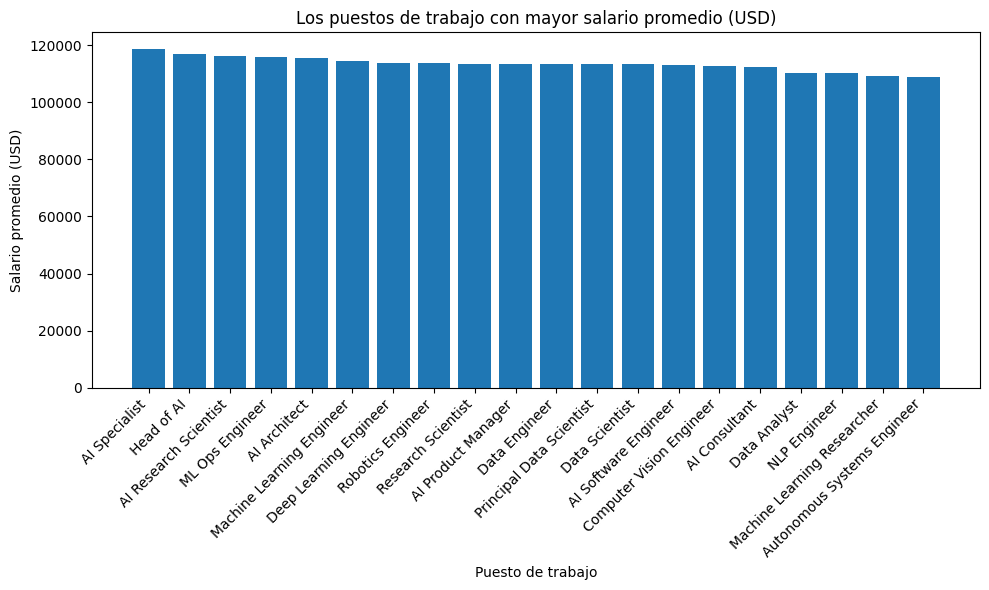

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(order['job_title'][:], order['salary_usd'][:])
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario promedio (USD)')
plt.title('Los puestos de trabajo con mayor salario promedio (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. ¿En qué paises se encuentran ubicadas las compañias con mejores salarios?

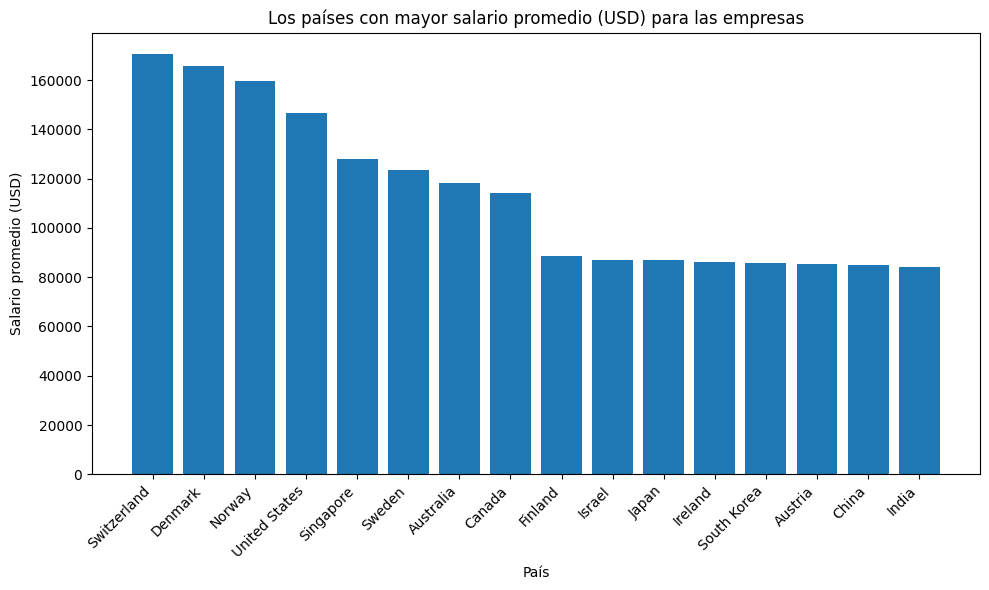

In [25]:
import matplotlib.pyplot as plt
resultados_paises = database_usd.groupby('company_location')['salary_usd'].mean().reset_index()
order_paises = resultados_paises.sort_values(by='salary_usd', ascending=False)
order_paises.head()

plt.figure(figsize=(10, 6))
plt.bar(order_paises['company_location'][:], order_paises['salary_usd'][:])
plt.xlabel('País')
plt.ylabel('Salario promedio (USD)')
plt.title('Los países con mayor salario promedio (USD) para las empresas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Industria con mayor salario promedio (USD) para las empresas en Switzerland

In [31]:
Switzerland = database_usd[database_usd['company_location'] == 'Switzerland']
company_size_Switzerland = Switzerland.groupby('industry')['salary_usd'].mean().reset_index()
order_company_size_Switzerland = company_size_Switzerland.sort_values(by='salary_usd', ascending=False)

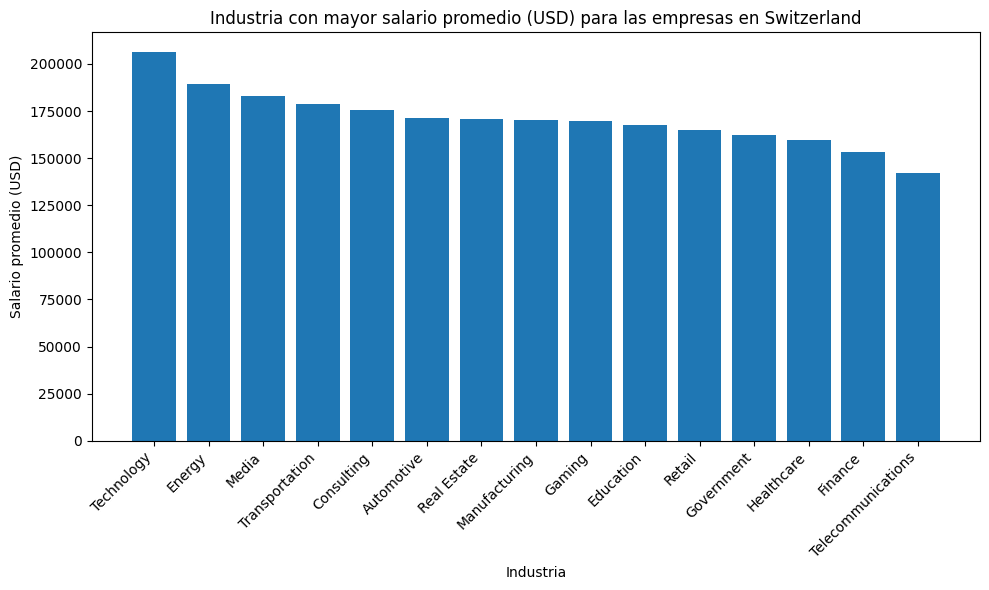

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(order_company_size_Switzerland['industry'][:], order_company_size_Switzerland['salary_usd'][:])
plt.xlabel('Industria')
plt.ylabel('Salario promedio (USD)')
plt.title('Industria con mayor salario promedio (USD) para las empresas en Switzerland')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()